# NN 2 (Mehrere unterscheiden)

In [2]:
import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical
from numpy import load
import matplotlib.pyplot as plt


## Datensatz laden

In [ ]:
X_train = load('Dataset/X_train.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_train = load('Dataset/y_train.npy').astype(np.int32)

X_test=load('Dataset/X_test.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_test=load('Dataset/y_test.npy').astype(np.int32)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Modell erstellen

In [44]:
model = Sequential()

model.add(Dense(50, activation="sigmoid", input_shape=(784,)))
model.add(Dense(5, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
X_train.reshape(10500, 784)

array([[1.        , 1.        , 1.        , ..., 0.03137255, 0.05490196,
        0.25490198],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.7490196 , 0.92156863,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

## Modell trainieren

In [43]:
model.fit(
    X_train.reshape(10500, 784),
    y_train,
    epochs=80,
    batch_size=500)


Epoch 1/80
21/21 [==============================] - 0s 2ms/step - loss: 1.7058 - accuracy: 0.2166
Epoch 2/80
21/21 [==============================] - 0s 2ms/step - loss: 1.5278 - accuracy: 0.3683
Epoch 3/80
21/21 [==============================] - 0s 2ms/step - loss: 1.4412 - accuracy: 0.5316
Epoch 4/80
21/21 [==============================] - 0s 2ms/step - loss: 1.3772 - accuracy: 0.6064
Epoch 5/80
21/21 [==============================] - 0s 2ms/step - loss: 1.3232 - accuracy: 0.6350
Epoch 6/80
21/21 [==============================] - 0s 2ms/step - loss: 1.2758 - accuracy: 0.6563
Epoch 7/80
21/21 [==============================] - 0s 2ms/step - loss: 1.2330 - accuracy: 0.6713
Epoch 8/80
21/21 [==============================] - 0s 2ms/step - loss: 1.1940 - accuracy: 0.6790
Epoch 9/80
21/21 [==============================] - 0s 2ms/step - loss: 1.1582 - accuracy: 0.6880
Epoch 10/80
21/21 [==============================] - 0s 2ms/step - loss: 1.1254 - accuracy: 0.6930
Epoch 11/80
21/21 [

## Evaluieren

In [15]:
model.evaluate(X_test.reshape(-1, 784), y_test)

141/141 [==============================] - 0s 652us/step - loss: 0.4513 - accuracy: 0.8444


[0.4513035714626312, 0.8444444537162781]

In [16]:
model.predict(X_test.reshape(-1, 784))

array([[0.8298336 , 0.31209514, 0.47636315, 0.0103268 , 0.9740795 ],
       [0.07215902, 0.8501724 , 0.8983382 , 0.26649636, 0.15596557],
       [0.01050031, 0.8435353 , 0.7397574 , 0.994187  , 0.01460776],
       ...,
       [0.03717381, 0.9012717 , 0.9380197 , 0.4403568 , 0.07745972],
       [0.15940586, 0.89075804, 0.8651399 , 0.27076885, 0.1219281 ],
       [0.9742968 , 0.41822356, 0.17717078, 0.00578889, 0.94266415]],
      dtype=float32)

## Model testen

[0. 0. 0. 0. 1.]


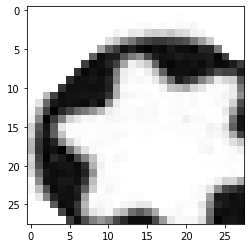

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[0])

plt.imshow(X_test[0].reshape(28,28), cmap="gray")
plt.show()

In [19]:
pred = model.predict(X_test.reshape(-1, 784))

In [22]:
import numpy as np
# Klasse mit höchster Wahrscheinlichkeit ausgeben:
np.argmax(pred[0])

4

**Das Modell hat Klasse 4 korrekt erkannt.**

In [23]:
np.argmax(pred, axis=1)

array([4, 2, 3, ..., 2, 1, 0])

## Confusion Matrix

In [3]:
import pandas as pd
ytrue = pd.Series(np.argmax(y_test, axis= 1), name = 'ytrue')
ypred = pd.Series(np.argmax(pred, axis= 1), name = 'pred')
pd.crosstab(ytrue, ypred)

NameError: name 'y_test' is not defined